<a href="https://colab.research.google.com/github/MertYuksek/convolution-sobel-impl/blob/main/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mert Yüksek
## Homework A1
### LECTURE: BIM496_Computer Vision
#### Github Link:


In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
def generalized_sobel(n, axis=0):
    shape = (n,n)
    k = np.zeros(shape)
    p = [(j,i) for j in range(shape[0]) 
           for i in range(shape[1]) 
           if not (i == (shape[1] -1)/2. and j == (shape[0] -1)/2.)]

    for j, i in p:
        j_ = int(j - (shape[0] -1)/2.)
        i_ = int(i - (shape[1] -1)/2.)
        k[j,i] = ((i_ if axis==0 else j_)/float(i_*i_ + j_*j_))*2
    
    return k

In [3]:
def my_conv(img, kernel):

  # Due to convolutional operations our image size decrease.
  # To prevent this we should add padding to an image.
  padding = (len(kernel)-1)/2
  img_pad = add_padding(int(padding), img)
  img_gray = cv2.cvtColor(img_pad, cv2.COLOR_BGR2GRAY)
  img_array = np.array(img_gray)

  # get original image size as a target
  w = img.shape[0]
  h = img.shape[1]
  k = kernel.shape[0]
  filter_img = np.zeros((w, h))

  for i in range(w):
    for j in range(h):
      mat = img_array[i:i+k, j:j+k]
      if (mat.shape == kernel.shape):
        filter_img[i][j] = np.sum(np.multiply(mat, kernel))
      else:
        filter_img[i][j] = img_array[i][j]

  return  filter_img

In [4]:
def get_gradient_magnitude(gx, gy):
  sum_of_squares = np.add(np.square(gx), np.square(gy))
  return np.sqrt(sum_of_squares)

In [5]:
def get_gradient_direction(gx, gy):
  return np.arctan2(gy, gx)

In [6]:
def add_padding(n, img):
  return cv2.copyMakeBorder(img, n, n, n, n, cv2.BORDER_CONSTANT)

In [20]:
def main():

  while True:

    # get image path
    image_path = input("Enter your image path for example; zeb.jpg: ")
    
    # get kernel size for example; 3 => this means 3x3 kernel
    kernel_size = input("Enter your kernel size (It should be odd number): ")
    if kernel_size.isnumeric():
      kernel_size = int(kernel_size)
    else:
      print("Kernel size should be integer")
      continue

    # read image
    img = cv2.imread(image_path)
    if img is None:
      print("Image path is wrong")
      continue
    
    break

  # calculate gradients, magnitudes and orientation.
  image_sx     = my_conv(img, generalized_sobel(kernel_size, 0))
  image_sy     = my_conv(img, generalized_sobel(kernel_size, 1))
  image_grad   = get_gradient_magnitude(image_sx, image_sy)
  image_orient = get_gradient_direction(image_sx, image_sy)

  plt.imsave('image_sx.jpg', image_sx, cmap='gray')
  plt.imsave('image_sy.jpg', image_sy, cmap='gray')
  plt.imsave('image_grad.jpg', image_grad, cmap='gray')
  plt.imsave('image_orient.jpg', image_orient, cmap='gray')

  f, axarr = plt.subplots(2,2, dpi=150)
  axarr[0,0].imshow(image_sx, cmap='gray')
  axarr[0,0].set_title("image_sx")
  axarr[0,1].imshow(image_sy, cmap='gray')
  axarr[0,1].set_title("image_sy")
  axarr[1,0].imshow(image_grad, cmap='gray')
  axarr[1,0].set_title("image_grad")
  axarr[1,1].imshow(image_orient, cmap='gray')
  axarr[1,1].set_title("image_orient")

  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

Enter your image path for example; zeb.jpg: zeb.jpg
Enter your kernel size (It should be odd number): 3


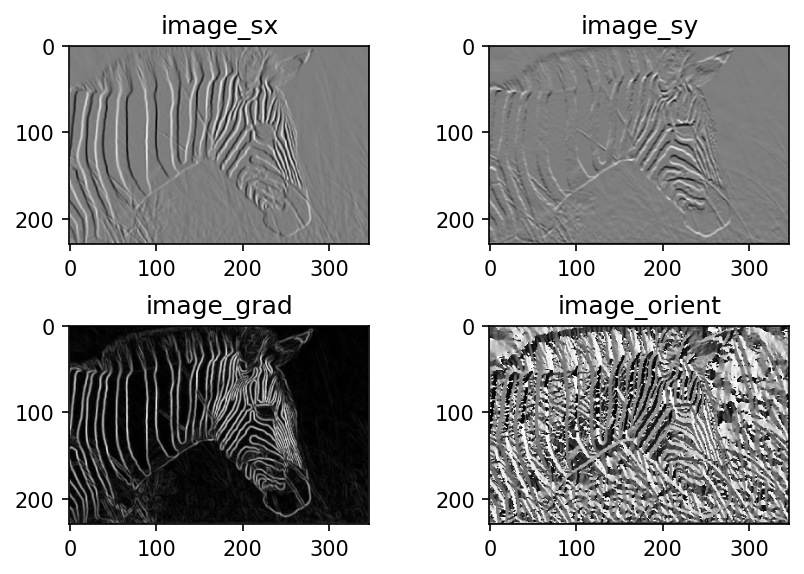

In [21]:
main()